Name :- Kalash Kalwani


Email :- kalashkalwani2000@gmail.com


Course :- B-Tech (Informtion Technology) 


Semester :- 6th


University :- Medi-caps University, Indore , India


Contact :- 7987299022


Linkedin :- https://www.linkedin.com/in/kalashkalwani/

#  :- Data Science and Business Analytics Task -1

##         :- Prediction Using Supervised ML

In [7]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.linear_model import LinearRegression 
%matplotlib inline

In [8]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [9]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### From above observations :-
###### Average study Hours - 5hr
###### Average Scores - 51 .48


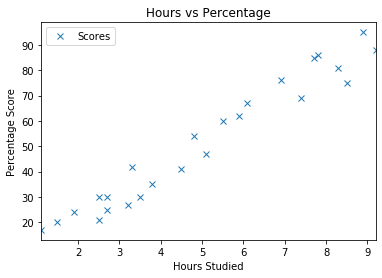

In [11]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='x')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**



Now that we have our attributes and labels, the next step is to split this data into training and test sets.

In [12]:
def data_split(data,ratio):
    np.random.seed(0)
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*ratio)
    test_indicies=shuffled[:test_set_size]
    train_indicies=shuffled[test_set_size:]
    return data.iloc[train_indicies],data.iloc[test_indicies]

In [13]:
train,test = data_split(data,.2)

In [14]:
x_train=train[['Hours']].to_numpy()
x_test=test[['Hours']].to_numpy()
y_train=train[['Scores']].to_numpy().reshape(train.shape[0],)
y_test=test[['Scores']].to_numpy().reshape(test.shape[0],)

In [15]:
X = data["Hours"]
Y= data["Scores"]

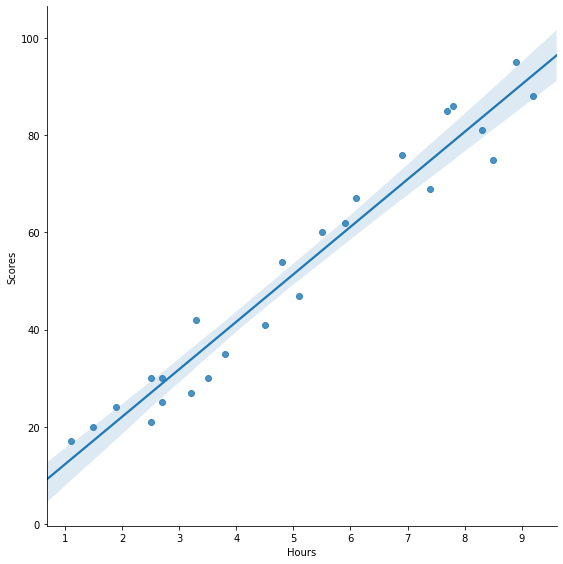

In [16]:
# Relationship between x_train and y_train
sns.pairplot(data, x_vars='Hours', y_vars='Scores', height=8, aspect=1, kind='reg')

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [17]:
mymodel = LinearRegression()  
mymodel.fit(x_train, y_train)


print("Training complete.")

Training complete.


#### Plotting the regression line

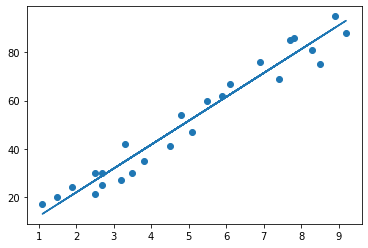

In [18]:
line = mymodel.coef_*X+mymodel.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [19]:
print(x_test) # Testing data - In Hours
y_pred = mymodel.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing Actual vs Predicted

In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Predicting of percentage score when study hours is 9.25hr a day.

In [21]:
hours = [[9.25]]
own_pred = mymodel.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### Our model predict that when student study 9.25hr a day, it will score 93.69173248737538

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error and RSME. There are many such metrics.

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 


Mean Absolute Error: 4.183859899002975


In [23]:
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 4.6474476121003665


## Thank you 